In [2]:
from typing import TypedDict, Optional, Annotated
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI # llm 모델 사용하기 위한 모듈
from langchain_core.messages import HumanMessage, AIMessage # message 양식 처리를 위한 모듈
from operator import add

from dotenv import load_dotenv
load_dotenv()

True

### 1. Reducer 함수를 사용해서 state 정의

In [3]:
class MessagesState(TypedDict):
    messages : Annotated[list[str], add]
    count : int
    count_list : Annotated[list[int], add]

### 2. 간단한 메시지 추가 노드 만들어보기

In [4]:
def add_message_1(state: MessagesState) -> MessagesState:
    """첫번째 메시지 추가 노드"""
    print("첫번째 메시지 추가")

    return {
        "messages" : ["첫번째 노드 추가해볼게요, 차요준님"], # 결과가 기존의 리스트와 내가 작성한 리스트의 합과 같다.
        "count" : state.get("count", 0) +1,
        "count_list" : [state.get("count", 0) + 1]
    }   


def add_message_2(state: MessagesState) -> MessagesState:
    """두번째 메시지 추가 노드"""
    print("두번째 메시지 추가")

    return {
        "messages" : ["두번째 노드 추가해볼게요, 황난혜님"],
        "count" : state.get("count", 0) +1,
        "count_list" : [state.get("count", 0) + 1]
    }   

### 3. 그래프 생성하기

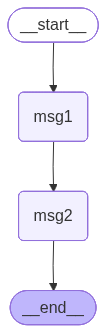

In [5]:
workflow = StateGraph(MessagesState)

workflow.add_node("msg1", add_message_1)
workflow.add_node("msg2", add_message_2)

workflow.add_edge("msg1", "msg2")

# 시작점
workflow.set_entry_point("msg1")

# 끝점
workflow.set_finish_point("msg2")

app = workflow.compile()
app

In [6]:
init_state = {
    "messages" : ["처음 시작해보겠습니다"],
    "count" : 0,
    "count_list" : []
}

result = app.invoke(init_state)
print(result)

첫번째 메시지 추가
두번째 메시지 추가
{'messages': ['처음 시작해보겠습니다', '첫번째 노드 추가해볼게요, 차요준님', '두번째 노드 추가해볼게요, 황난혜님'], 'count': 2, 'count_list': [1, 2]}


In [7]:
result

{'messages': ['처음 시작해보겠습니다', '첫번째 노드 추가해볼게요, 차요준님', '두번째 노드 추가해볼게요, 황난혜님'],
 'count': 2,
 'count_list': [1, 2]}